In [2]:
# pip install chardet pandas -i https://mirrors.aliyun.com/pypi/simple/

In [3]:
import chardet 
import pandas as pd
# 读取CSV文件
csv_file = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-五里湖心.csv'  # 替换为你的CSV文件路径

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())  # 读取文件内容，探测编码

print(result['encoding'])
# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

ascii


In [4]:
print(df.columns)

Index(['date', 'temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
       'conductivity', 'turbidity', 'chla', 'density'],
      dtype='object')


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.pri

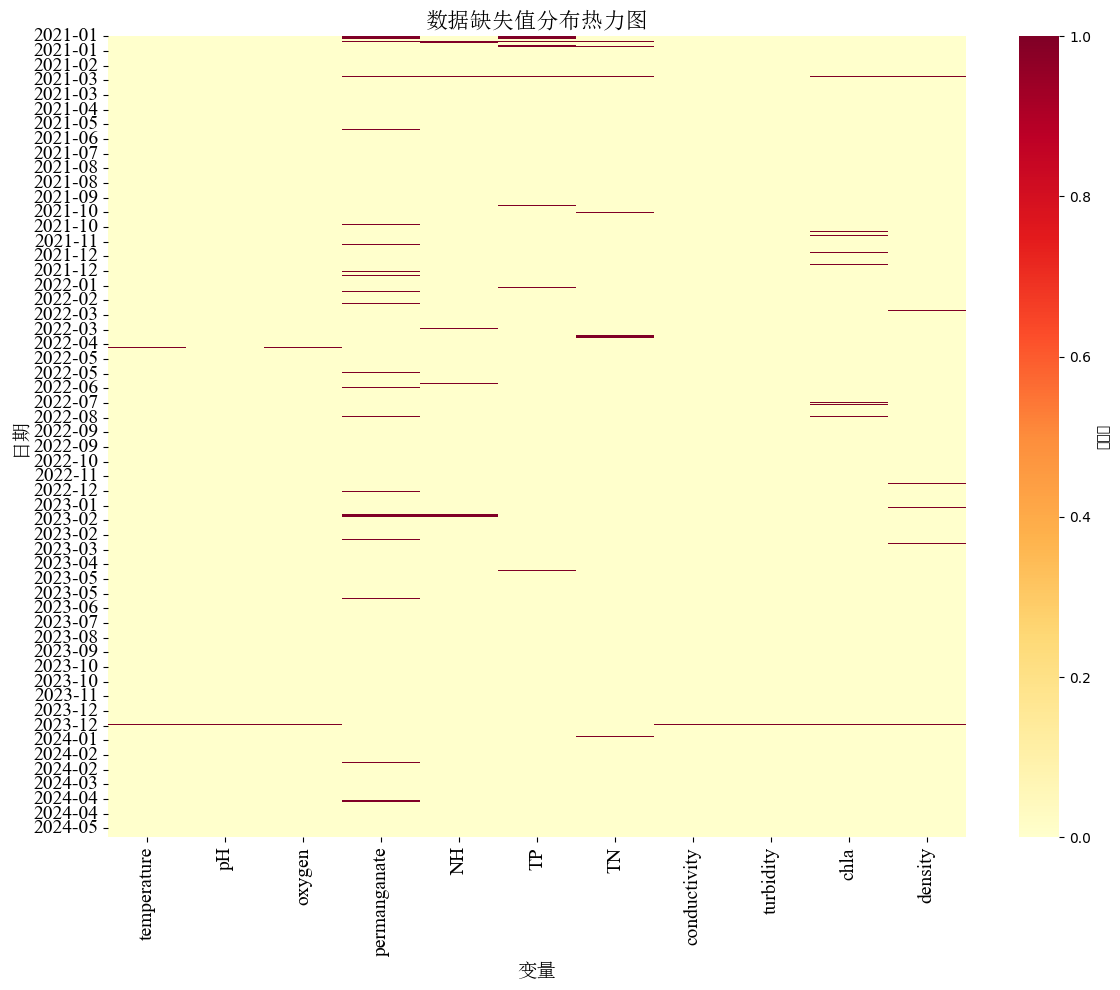

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

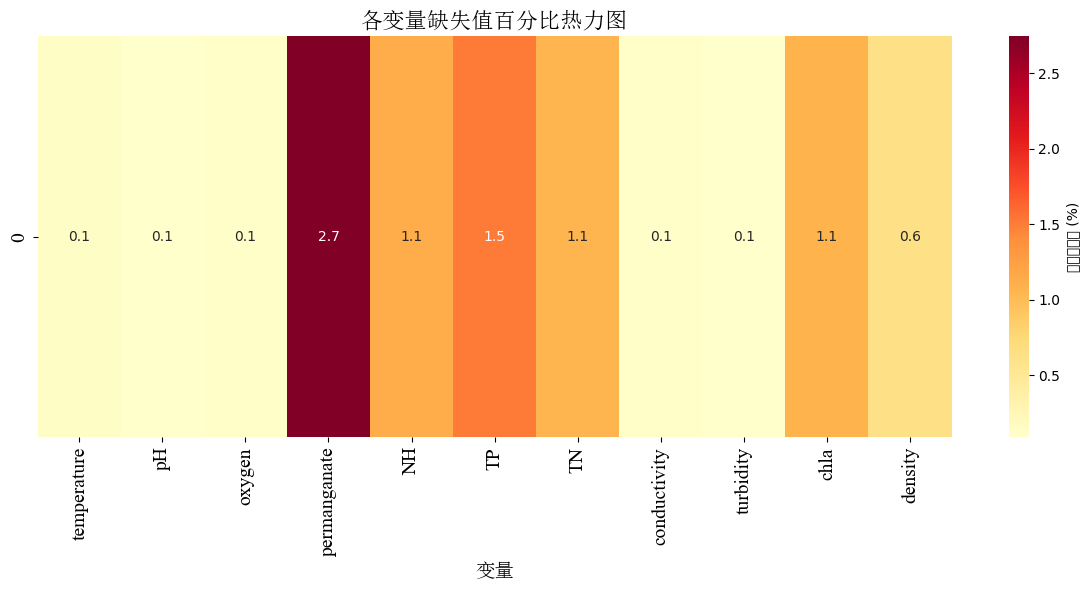

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 将日期列转换为字符串并截取前7位
df['date'] = df['date'].astype(str).str[:7]

# 将除date外的负值替换为nan
columns_to_process = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
                     'conductivity', 'turbidity', 'chla', 'density']
for col in columns_to_process:
    df.loc[df[col] < 0, col] = np.nan

# 创建缺失值热力图
plt.figure(figsize=(12, 10))
missing_data = df.set_index('date')[columns_to_process].isnull()
# 设置刻度
ax = plt.gca()
# 只显示开始和末尾的刻度
date_ticks = [missing_data.index[0], missing_data.index[-1]]  # 只取第一个和最后一个日期
ax.set_yticks([0, len(missing_data)-1])  # 设置开始和结束位置的刻度
ax.set_yticklabels(date_ticks, rotation=45)  # 设置刻度标签并旋转45度

plt.setp(ax.get_yticklabels(), rotation=45)  # 旋转45度以避免重叠

sns.heatmap(missing_data, 
            cmap='YlOrRd',
            cbar_kws={'label': '缺失值'})
plt.title('数据缺失值分布热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('变量', fontproperties=chinese_font, fontsize=14)
plt.ylabel('日期', fontproperties=chinese_font, fontsize=14)

# 设置坐标轴刻度字体为英文字体,增大刻度字号
plt.tick_params(axis='both', which='major', labelsize=12)
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

# 计算每个变量的缺失值百分比并用热力图展示
missing_percentages = df[columns_to_process].isnull().sum() * 100 / len(df)
missing_percentages = pd.DataFrame(missing_percentages).T
plt.figure(figsize=(12, 6))
sns.heatmap(missing_percentages,
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': '缺失百分比 (%)', 'label_font': chinese_font})
plt.title('各变量缺失值百分比热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('变量', fontproperties=chinese_font, fontsize=14)
plt.ylabel('')

# 设置坐标轴刻度字体为英文字体,增大刻度字号
plt.tick_params(axis='both', which='major', labelsize=12)
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()
